<div 
     style="padding: 20px; 
            color: white;
            font-size: 250%;
            text-align: center;
            display: fill;
            border-radius: 5px;
            background-color: #66023C;
            overflow: hidden;
            font-weight: 700;
            border: 5px solid #F28C28;"
     >
    🏆 Machine Learning Grandmaster
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #e8f4ff;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Welcome to ML Grandmaster, where we'll take a look at the most important Machine Learning algorithms and fundamental concepts from the ground up. <br>
    We'll look at the theory behind the concepts and also the code to implement these ideas in the real world.
</div>

## ML Grandmaster Notebooks
<br>
<div
     style="float: left; position: relative; width: 100%;"
     >
    <table
           style="float: left; font-size: 16px"
           >
      <tr>
        <th><b>📈 Machine Learning Fundamentals</b></th>
        <th><b>🌳 Decision Trees</b></th>
      </tr>
      <tr>
        <td>Linear Regression [work in progress]</td>
        <td><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-classifier">Decision Tree Classification</a></td>
      </tr>
      <tr>
        <td></td>
        <td><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-regressor">Decision Tree Regression</a></td>
      </tr>
      <tr>
        <td></td>
        <td><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-random-forest/">Random Forest</a></td>
      </tr>
      <tr>
        <td></td>
        <td><a href="https://www.kaggle.com/chazzer/ml-grandmaster-gradient-boosting-xgboost/">Gradient Boosting (XGBoost)</a></td>
      </tr>
    </table>
</div>

<div 
     style="padding: 20px; 
            color: white;
            font-size: 250%;
            text-align: center;
            display: fill;
            border-radius: 5px;
            background-color: #023c66;
            overflow: hidden;
            font-weight: 700;
            border: 5px solid #7ace07;"
     >
    🌳 Gradient Boosting (XGBoost)
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    In this ML Grandmaster notebook, we'll be taking a look at Gradient Boosting from the ground up, and overviewing XGBoost (eXtreme Gradient Boost), one of the most popular Gradient Boosting algorithms. <br>
</div>

![extreme](https://media2.giphy.com/media/uaOqWaZpebl8k/giphy.gif?cid=790b76112d4331bddab4d09906a33b08afb80497911f4b8c&rid=giphy.gif&ct=g)

# 👉 Index
* [📚 Prerequisites and Notes](#0)
* [🤨 Intuition](#1)
* [🚚 Import](#2)
    - [Packages](#2.1)
    - [Dataset](#2.2)
* [🚀 Gradient Boosting Algorithm](#3)
* [📉 Loss Function](#4)
* [🧱 Building the Boosted Tree](#5)
    - [Step 1](#5.1)
    - [Step 2A](#5.2)
    - [Step 2B](#5.3)
    - [Step 2C](#5.4)
    - [Step 3](#5.5)
* [💥 XGBoost Overview](#6)
* [💻 Code Implementation](#7)
* [🙇 Conclusion](#8)

<a id="0"></a>
# 📚 Prerequisites and Notes

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Prerequisites: 
    <ul>
        <li><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-classifier/">🌳 Decision Tree Classification</a></li>
        <li><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-regressor/">🌳 Decision Tree Regression</a></li>
        <li><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-random-forest/">🌳 Random Forest</a></li>
    </ul>
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Gradient Boosted Trees are some of the most popular Ensemble Learning models, and some of the best models, performance wise, on large tabular datasets. <br>
    XGBoost is one of the most popular Gradient Boosting algorithms, as we can see from the winning kernels of a lot of Kaggle competitions!
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Learning how Gradient Boosting works, and learning about one of its most popular implementations XGBoost, will give us some insights into real world predictive models in High Energy Physics, Recommendation Systems, Ad Click Through Rate Predictors and so on.
</div>

<a id="1"></a>
# 🤨 Intuition

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    The fundamental idea behind Gradient Boosted Trees is that it is an Ensemble Learning technique (so $ N $ trees are used) where each tree tries to improve the result of the previous tree, by optimizing the difference between its predictions and the output value. <br>
    This differs from <a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-random-forest/">🌳 Random Forests</a>, which is still an Ensemble Learning method, but there, each tree makes a prediction independently from the other trees, and the final prediction is an aggregation of the predictions of each tree. <br>
    The image below gives us an idea of how a prediction is made by a Gradient Boosted Tree.
</div>

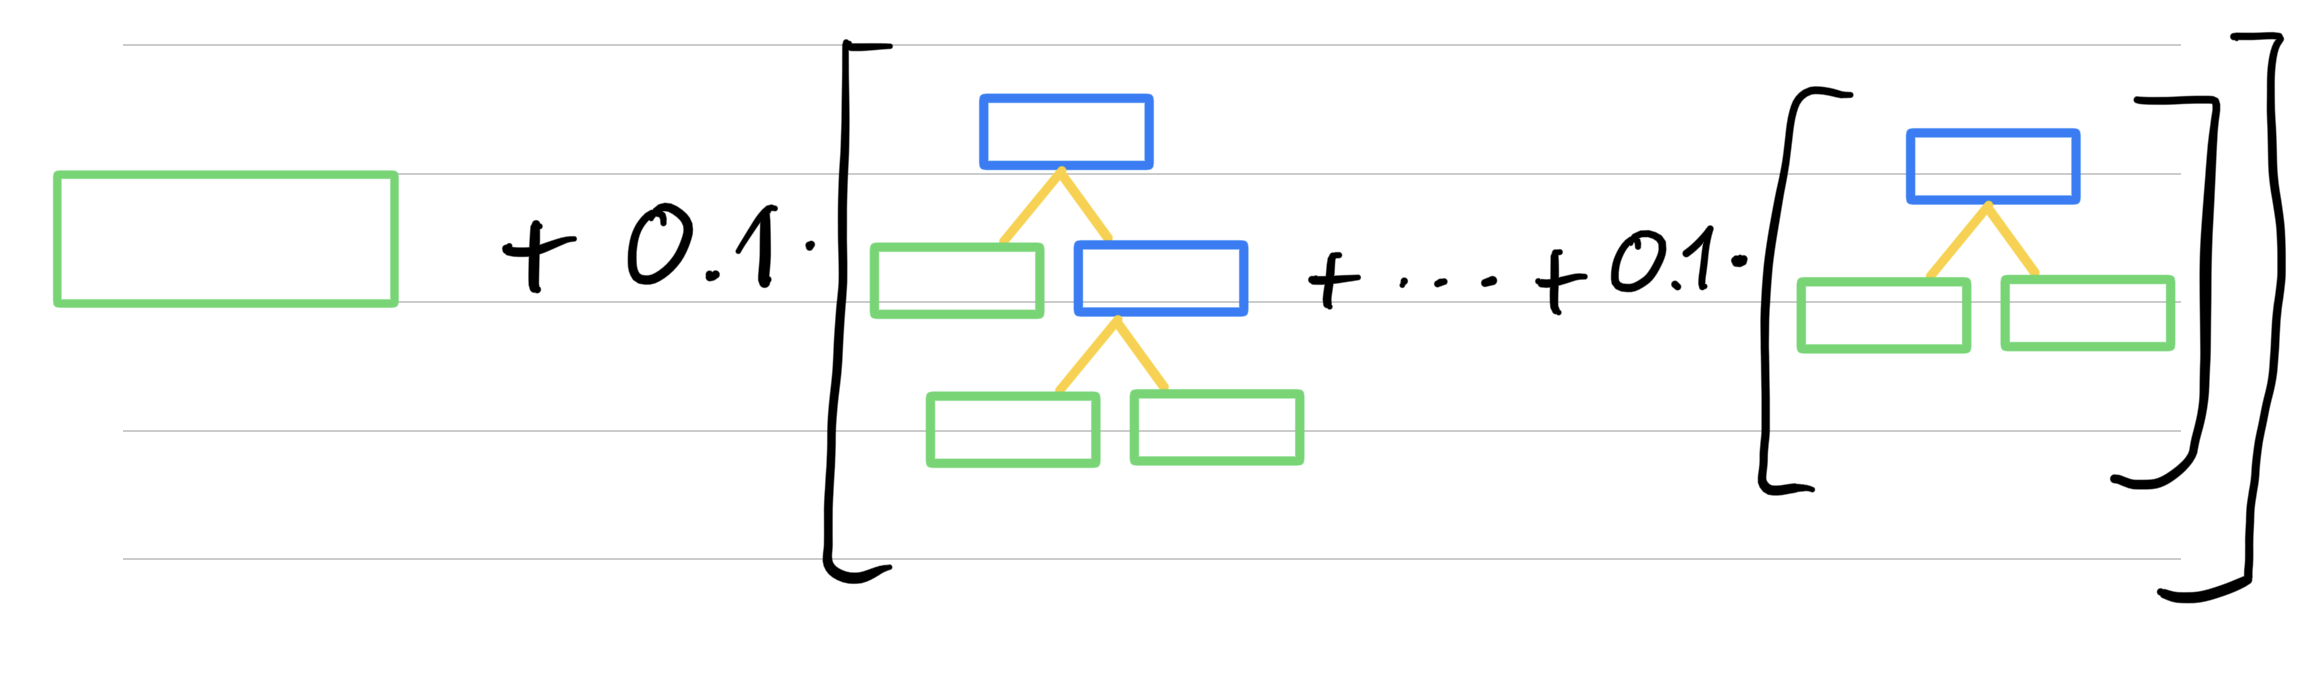

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Note: these individual trees are usually called <i><u>Base Estimators</u></i> or <i><u>Weak Estimators</u></i>. <br>
    We'll walk through the Gradient Boosting Algorithm in this notebook for a Regression problem, and see how it works on a simplified version of the House Prices dataset.
</div>

<a id="2"></a>
# 🚚 Import

<a id="2.1"></a>
## Packages

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data manipulation

from xgboost import XGBRegressor  # model

from sklearn.tree import DecisionTreeRegressor  # model (used in Building Tree walkthrough)
from matplotlib import pyplot as plt  # visualization
from sklearn.tree import plot_tree  # tree visualization

In [ ]:
np.random.seed(42)  # set random number generator seed (for reproducibility)

<a id="2.2"></a>
## Dataset

In [ ]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [ ]:
def preprocess(df):
    cols_to_drop = [col for col in df.columns if col not in ['LotArea', 'SalePrice']]
    df['Pool'] = (df['PoolArea'] > 0).astype('int64')
    df['NewConstruction'] = (df['SaleType'] == 'New').astype('int64')
    df['SalePrice'] = df['SalePrice'] // 1000
    df = df.drop(columns=cols_to_drop)
    df = df[['NewConstruction', 'Pool', 'LotArea', 'SalePrice']]
    
    return df

In [ ]:
df = df.iloc[[197, 810, 11, 18, 1449], :]
df = preprocess(df)
df

<a id="3"></a>
# 🚀 Gradient Boosting Algorithm

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    The Gradient Boosting Algorithm is what allows us to build a Gradient Boosted Tree. Each Gradient Boosted Tree implementation (i.e. XGBoost or LightGBM) uses different versions of this algorithm, but they all follow this general guideline. <br>
    Let's define the algorithm below.
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Given an input variable $ x_i $, an output variable $ y_i $ where $ i \in \{1, ... , n\} $ where $ n $ is the number of samples. <br>
    Given a differentiable <i>Loss Function</i> $ L(y,F(x)) $. <br>
    Given a <i>Number of Base Estimators</i> $ M $. <br>
    Given a <i>Learning Rate</i> $ \nu $ so that $ 0 < \nu \leq 1 $. <br>
    <ol>
        <li>Initialize the model with a constant value $F_0(x) = \underset{\gamma}{\arg\min} \sum_{i=1}^n L(y_i, \gamma)$ (for Regression, this will usually be the mean of output values)</li>
        <li>
            For $ m = 1 $ to $ M $
            <ol>
                <li>
                    Compute the so-called pseudo-residuals:
                    $$ r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x)=F_{m-1}(x)} \quad \mbox{for } i=1,\ldots,n $$
                </li>
                <li>
                    Fit a CART (<a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-classifier/">🌳 Classifier</a> or <a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-regressor/">🌳 Regressor</a>) Base Estimator (or Weak Estimator) to pseudo-residuals, trained using the training set $ \{(x_i, r_{im})\}_{i=1}^n $, to create residual estimates $ \gamma_{im} $.
                </li>
                <li>
                    Update the model: 
                    $$ F_{m}(x)=F_{{m-1}}(x) + \nu \cdot \gamma_m $$
                </li>
            </ol>
        </li>
        <li>
            $ F_M(x) $ will be our final predictor.
        </li>
    </ol>
 </div>

![huh](https://i.imgflip.com/1myuho.jpg)

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Let's clear this math up by going through the algorithm step by step.
</div>

<a id="4"></a>
# 📉 Loss Function

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    The Loss function is the heart of our algorithm. In Step 2A, we take the Gradient of the Loss function to optimize our Tree. <br>
    This is why it's called <i>Gradient</i> boosting.
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Given an observed value $ y_i $ and an estimated value $ F(x_i) $ let's take our Loss Function to be:
    $$ L(y_i, F(x_i)) = \frac{1}{2} (y_i - F(x_i))^2 $$
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    This Loss Function allows us to compute the pseudo-residuals very easily, since when we take its derivative:
    $$ r_{i} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right] = -\frac{\partial}{\partial F(x_i)} \frac{1}{2} (y_i - F(x_i))^2 = $$
    $$ = - (-1) \frac{2}{2}(y_i - F(x_i)) = y_i - F(x_i)$$
    The pseudo-residuals end up being standard residuals, a.k.a the difference between observed value and estimated value. Very easy to compute. <br>
    There are other Loss Functions we could choose, but we'll go with this one.
</div>

<a id="5"></a>
# 🧱 Building the Boosted Tree

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Let's go through the Gradient Boosting Algorithm and build our Gradient Boosted Tree, using our example dataset.
</div>

In [ ]:
df

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    In our example dataset, the y variable (what we want to predict) will be SalePrice, while the x variables will be NewConstruction, Pool, LotArea.
</div>

<a id="5.1"></a>
## Step 1

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Step 1: Initialize the model with a constant value $F_0(x) = \underset{\gamma}{\arg\min} \sum_{i=1}^n L(y_i, \gamma)$ (for Regression, this will usually be the mean of output values). <br>
    So let's take the mean of SalePrice.
</div>

In [ ]:
df['F0'] = df['SalePrice'].mean()
df

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Now we start with Step 2. To keep things simple, let's keep set the Number of Base Estimators to $ M = 2 $. <br>
    So we'll iterate 2 times, $ m $ will go from 1 to 2. <br>
    Let's go through iteration 1 in the next sections.
</div>

<a id="5.2"></a>
## Step 2A

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Step 2A: Compute the so-called pseudo-residuals:
    $$ r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x)=F_{m-1}(x)} \quad \mbox{for } i=1,\ldots,n $$
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    We start our first iteration $ m = 1 $. As we've calculated in the Loss Function section, our pseudo-residuals $ r_{i1} $ turn out to be very simply standard residuals:
    $$ r_{i1} = y_i - F_0(x_i) $$
</div>

In [ ]:
df

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    In our example dataset $ y_i $ are the samples in the SalePrice column, and $ F_0(x_i) $ is the column F0 we calculated in Step 1. <br>
    So now let's calculate the residuals, which we'll call r1 in the dataframe.
</div>

In [ ]:
df['r1'] = df['SalePrice'] - df['F0']
df

<a id="5.3"></a>
## Step 2B

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Step 2B: Fit a CART (<a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-classifier/">🌳 Classifier</a> or <a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-regressor/">🌳 Regressor</a>) Base Estimator (or Weak Estimator) to pseudo-residuals, trained using the training set $ \{(x_i, r_{im})\}_{i=1}^n $, to create residual estimates $ \gamma_{im} $.
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    In this step we fit a <a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-regressor/">🌳 Decision Tree Regressor</a> (if this were a Classification problem, we'd use a <a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-classifier/">🌳 Decision Tree Classifier</a>). <br>
    We won't go into much detail in this step, since we have 2 whole notebooks in the 🏆 ML Grandmaster series dedicated to these topics. <br>
    For this step we'll leverage sklearn's DecisionTreeRegressor to make the predictions $ \gamma_{i1} $.
</div>

In [ ]:
baselearner1 = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    min_samples_split=4
)

In [ ]:
baselearner1.fit(
    X=df[['NewConstruction', 'Pool', 'LotArea']],
    y=df['r1']
)

In [ ]:
df['gamma1'] = baselearner1.predict(X=df[['NewConstruction', 'Pool', 'LotArea']])
df

<a id="5.4"></a>
## Step 2C

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Step 2C: Update the model: 
    $$ F_{m}(x) = F_{{m-1}}(x) + \nu \cdot \gamma_m $$
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    For this step, we need to talk about the Learning Rate $ \nu $ (pronounced "nu". However the XGBoost documentation refers to it as "eta" which is the pronunciation of the greek letter $ \eta $. I don't know why they did this). <br>
    The Learning Rate is a number greater than 0 but smaller than 1, and it must be thought of as parameter that modulates by how much each Gradient Boost step must move in the right direction. <br>
    The closer to 1, the bigger the step. The closer to 0, the smaller the step.
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    For our example, let's choose $ \nu = 0.1 $. <br>
    Note, it has been empirically shown that a small Learning Rate $ \nu $ and a large number of Base Estimators $ M $ yields better performance than a large Learning rate and a small number of Base Estimators $ M $. This however comes at a computational cost, since computational complexity scales with $ M $.
</div>

In [ ]:
nu = 0.1

df['F1'] = df['F0'] + nu * df['gamma1']
df

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    And with this, we are done with iteration 1! That was not as bad as it looked lol. <br>
    Now let's quickly go over through all steps of iteration 2.
</div>

In [ ]:
# iteration 2 (m = 2)

# step 2A
df['r2'] = df['SalePrice'] - df['F1']

# step 2B
baselearner2 = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    min_samples_split=4
)
baselearner2.fit(
    X=df[['NewConstruction', 'Pool', 'LotArea']],
    y=df['r2']
)
df['gamma2'] = baselearner2.predict(X=df[['NewConstruction', 'Pool', 'LotArea']])

# step2C
df['F2'] = df['F1'] + nu * df['gamma2']

df

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    And with that, we are done with our iterations. Great!
</div>

<a id="5.5"></a>
## Step 3

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Step 3: $ F_M(x) $ will be our final predictor.
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Since we set $ M = 2 $ Base Estimators, our final predictor will be $ F_2(x) $, our F2 column in the dataset.
</div>

In [ ]:
df['F2']

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    And with this, we are done going through our simple example! <br>
    Please keep in mind that in a real world setting, our number of Base Learners would be in the hundreds, thousands, or more, and our training dataset would not be comprised of only 5 rows.
</div>

<a id="6"></a>
# 💥 XGBoost Overview

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    XGBoost is an implementation of Gradient Boosting with several extra features implemented to improve model performance and execution speed.
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Model Features:
    <ul>
        <li>Standard Gradient Boosting algorithm.</li>
        <li>Stochastic Gradient Boosting with sub-sampling at the row, column and column per split levels.</li>
        <li>Regularized Gradient Boosting with both L1 and L2 regularization.</li>
    </ul>
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    System Features:
    <ul>
        <li>Parallelization of tree construction using all of your CPU (or GPU) cores during training.</li>
        <li>Distributed Computing for training very large models using a cluster of machines.</li>
        <li>Out-of-Core Computing for very large datasets that don’t fit into memory.</li>
        <li>Cache Optimization of data structures and algorithm to make best use of hardware.</li>
    </ul>
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Algorithm Features:
    <ul>
        <li>Sparse Aware implementation with automatic handling of missing data values.</li>
        <li>Block Structure to support the parallelization of tree construction.</li>
        <li>Continued Training so that you can further boost an already fitted model on new data.</li>
    </ul>
</div>

<a id="7"></a>
# 💻 Code Implementation

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    xgboost's XGBRegressor will be doing all of the heavy lifting for us. Now that we have a better understanding of how it works, we can better appreciate open source development!
</div>

In [ ]:
# defining our tree object with the hyper parameters discussed above
model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
)

# XGBoost version of Gradient Boosting Algorithm that builds the tree based on our data
model.fit(
    X=df[['NewConstruction', 'Pool', 'LotArea']],
    y=df['SalePrice']
)

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    So now, let's predict the SalePrice of a house with the following characteristics. <br>
    NewConstruction = 0, Pool = 0, LotArea = 10000. 
</div>

In [ ]:
inputs = pd.DataFrame([{"NewConstruction": 0, "Pool": 0, "LotArea": 10000}])
prediction = model.predict(inputs)
print(f"XGBoost's predicted Sale Price: {prediction}")

<a id="8"></a>
# 🙇 Conclusion

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    With this, our Gradient Boosting and XGBoost notebook has come to an end. <br>
    If there are any mistakes, please point them out to me in the commets, this is a living and breathing document. <br>
    For a more detailed look at how to build an individual Decision Tree with the CART Algorithm, I recommend these 2 notebooks: <br>
    <ul>
        <li><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-classifier/">🌳 Decision Tree Classification</a></li>
        <li><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-regressor/">🌳 Decision Tree Regression</a></li>
    </ul>
    For a related Ensemble Learning method: <a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-random-forest/">🌳 Random Forest</a>
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    If you want to see XGBoost in action during a competition, <a href="https://www.kaggle.com/code/chazzer/rocket-league-xgboost-feat-engineering-cv">check out this notebook</a>.
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Shoutout to <a href="https://www.youtube.com/watch?v=3CC4N4z3GJc">StatQuest's videos on Gradient Boosting</a>, they were a big help while writing down this notebook. <br>
    Shoutout to <a href="https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/">this article by Jason Brownlee</a> as well, it covers the main advantages of XGBoost over regular Gradient Boosting. <br>
    For more on XGBoost, visit <a href="https://xgboost.readthedocs.io/en/stable/">the documentation</a>.
</div>

<div 
     style="padding: 20px; 
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #e8f4ff;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Stay tuned for more notebooks in the ML Grandmaster series. <br>
    I hope you find this series of notebooks useful/fun!
</div>

## ML Grandmaster Notebooks
<br>
<div
     style="float: left; position: relative; width: 100%;"
     >
    <table
           style="float: left; font-size: 16px"
           >
      <tr>
        <th><b>📈 Machine Learning Fundamentals</b></th>
        <th><b>🌳 Decision Trees</b></th>
      </tr>
      <tr>
        <td>Linear Regression [work in progress]</td>
        <td><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-classifier">Decision Tree Classification</a></td>
      </tr>
      <tr>
        <td></td>
        <td><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-regressor">Decision Tree Regression</a></td>
      </tr>
      <tr>
        <td></td>
        <td><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-random-forest/">Random Forest</a></td>
      </tr>
      <tr>
        <td></td>
        <td><a href="https://www.kaggle.com/chazzer/ml-grandmaster-gradient-boosting-xgboost/">Gradient Boosting (XGBoost)</a></td>
      </tr>
    </table>
</div>

<div 
     style="padding: 20px; 
            color: white;
            font-size: 250%;
            text-align: center;
            display: fill;
            border-radius: 5px;
            background-color: #66023C;
            overflow: hidden;
            font-weight: 700;
            border: 5px solid #F28C28;"
     >
    🏆 Machine Learning Grandmaster
</div>